# COLECTING INFORMATION ON **TECNOLOGIA** FROM BRAZILIAN WEBSITE **G1** AND SHOWING AS A WORD CLOUD


Every day technology advances by leaps and bounds, it is increasingly difficult to keep up to date with so much information that arrives every minute.

Regarding the size of the event, this project aims to use web scrapping to obtain information about the technological news happening in Brazil and plot it as a word cloud.

The source of our information is the g1 portal, an important Brazilian news site.            

# The Libraries 

We are using selenium and beautifulSoup to collect data from G1. Then, the first step is to import the required libraries.


In [1]:
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
import time
import requests
from bs4 import BeautifulSoup

# Reading the website

To cut some steps, we are retrieving data from the search result page in G1 (https://g1.globo.com/busca/?q=tecnologia&page=1)


In [2]:
url = 'https://g1.globo.com/busca/?q=tecnologia&page=1' # The url we are using to access


Then, let's set up the option to prevent google from opening while the code is running.

In [3]:
option = Options() 
option.headless = True 

You can use several browsers with selenium. In this project, we are using Google Chrome. 

To download your driver, click here: https://chromedriver.chromium.org/downloads 

Do not forget to find the correct version (according to your system and number).

In [4]:
driver = webdriver.Chrome('/usr/bin/chromedriver', options=option)
driver.get(url)

/tmp/ipykernel_196981/720208630.py:1: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome('/usr/bin/chromedriver', options=option)


As the page loads with more news and interests us, we use 'execute_script' to scroll the page and show more.

In [5]:
driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
time.sleep(10) #Waiting to have all data loaded

# Finding the content

Selenium works by retrieving data from webpage source code. To get the code, use Ctrl + U in google chrome.

Find the tag where the content (title and summary) of the data we want to analyze is. 

In this project, the element of the html is 'content'. Get the HTML using function get_attribute.

Finally, after quitting the browser,  Beautifulsoup converts the HTML to a better structure to manage the information. 

In [6]:
element = driver.find_element_by_id("content")
html = element.get_attribute('outerHTML')
print(element)
html = element.get_attribute('outerHTML')
driver.quit() #closes the browser 

soup = BeautifulSoup(html, 'lxml') #Interpretando o html

<selenium.webdriver.remote.webelement.WebElement (session="38234567eedfaaafcd51d50d416ff48f", element="a12cdf1d-baed-4589-981d-2dad453257b5")>


/tmp/ipykernel_196981/3148676045.py:1: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  element = driver.find_element_by_id("content")


# Title and summary

We use the title (in widget--info__title product-color) and the summary (in widget--info__description) to create our database and store in 'texto'.

In [7]:
texto = []

for bloco in soup.find_all(class_='widget--info__text-container'):
    # print(bloco)
    for href in bloco.find_all('a'):
        titulo = href.find(class_="widget--info__title product-color")
        if(titulo != None):
            print('titulo',titulo.text[7:-2])
            texto.append(titulo.text[7:-2])
        resumo = href.find(class_="widget--info__description")
        if(resumo != None):
            # print('Resumo',resumo)
            texto.append(resumo.text)
texto = ' '.join(texto)
print(texto)

titulo   UEM terá laboratório com tecnologia capaz de desenvolver vacinas
    
titulo   Empresas de inovação e tecnologia crescem no RS
    
titulo   Hospital das Clínicas da UFTM em Uberaba passa a contar com microscópio de tecnologia avançada em cirurgias do cérebro
    
titulo   Tecnologia auxilia na qualidade das sementes vendidas no país
    
titulo   Tecnologia auxilia na qualidade das sementes vendidas no país
    
titulo   Tecnologia ajuda a conectar empreendedores locais em Belém
    
titulo   Recife faz seleção simplificada com 30 vagas para área de tecnologia e salários de até R$ 6.800
    
titulo   Hub de tecnologia da Ambev e startups ofertam 93 vagas de emprego; veja áreas
    
titulo   Placa solar feita de papelão e garrafa: como escola pública no AC se tornou referência em projetos sobre fontes renováveis de energia
    
titulo   Pará recebe tecnologia inclusiva que transforma texto em áudio
    
titulo   Caminhão da Tecnologia chega a Ceilândia com cursos gratuitos de 

# The word cloud 

Now that we have the information from G1, let's show the word cloud according to the frequency of terms.

In this case, we have to cut the text into words (.split), convert them to lower caption (.lower), and remove pronouns, articles, and other common words to every text (the stop words)

In [8]:
import nltk

# nltk.download('stopwords')

stopwords = nltk.corpus.stopwords.words('portuguese') + ['cop']
comment_words = ''

tokens = texto.split()

for i in range(len(tokens)):
    tokens[i] = tokens[i].lower()
    comment_words += " ".join(tokens)+" "

# The plot 
 
To draw according to the theme, we use a mask as a baseline of the word cloud.
 
The word cloud is created using the function WordCLoud. We can easily remove stopwords, decide the background color, among other attributes within the function. 
 
Matplotlib is used to draw the image.

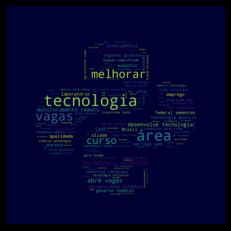

In [9]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
#from PIL import Imagenltk.download('stopwords')
from wordcloud import WordCloud

mask = np.array(Image.open('./PythonMask2.png'))

wordcloud = WordCloud(mask = mask, margin = 10,
                background_color ='rgb(0, 0, 51)',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)


default_colors = wordcloud.to_array()
plt.figure()
plt.imshow(default_colors, interpolation="bilinear")
wordcloud.to_file("wordcloud2.png")
plt.axis("off")
plt.show()


